<a href="https://colab.research.google.com/github/RonnyGuevara/Machine-Learning/blob/main/TP5/TP5_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

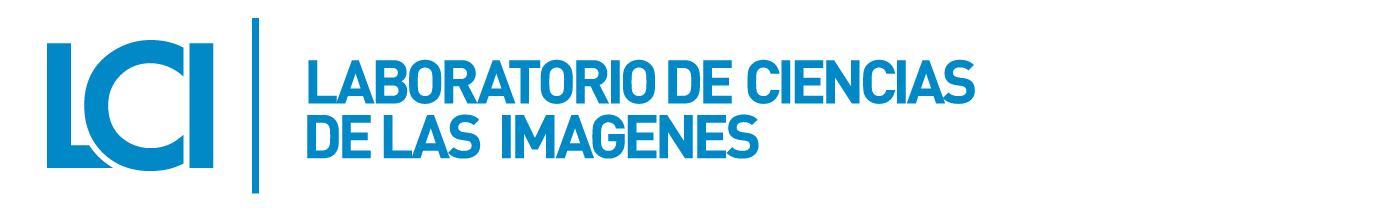

#Práctica 4: Clustering

##Presentado por: Ronny Guevara

## Objetivo General
Desarrollar un algoritmo de aprendizaje automático no-supervisado que permita encontrar segmentos en clientes minoristas
## Objetivos Específicos
*   Desarrollar clustering que permite segmentar en función del consumo anual de clientes minoristas
*   Verificar los métodos de clustering a diferentes parámetros
*   Visualizar los resultados para distintos métodos de clustering


###Problema
Segmentación de clientes: El objetivo es encontrar segmentos (grupos) de clientes minoristas en función de su patrón de consumo anual en diversas categorías de productos. https://github.com/manlio99/Materia-de-aprendizaje/tree/master/3_MidtermProjects/ProjectWC

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectWC/data/wholesale_customers_data.csv")
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [3]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [4]:
#Cuenta los valores nulos para cada columna
df.isnull().values.sum()

0

In [5]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [6]:
#info() devuelve el total de valores no nulos y tipo de dato para cada atributo
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [7]:
df.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


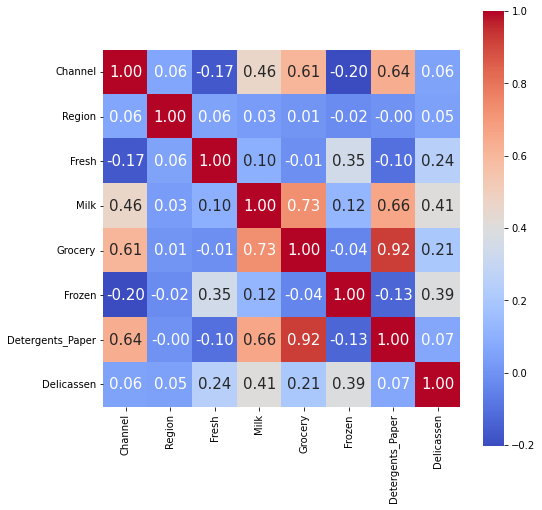

In [8]:
corr = df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= corr, yticklabels= corr,
           cmap= 'coolwarm')

Normalización de datos

In [9]:
from sklearn.preprocessing import normalize
df_nor = normalize(df)
df_nor = pd.DataFrame(df_nor, columns = df.columns)
df_nor

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294
...,...,...,...,...,...,...,...,...
435,0.000026,0.000078,0.776890,0.315197,0.419191,0.343549,0.004760,0.057646
436,0.000025,0.000076,0.990872,0.036146,0.019298,0.113919,0.002349,0.059258
437,0.000050,0.000075,0.364462,0.388465,0.758545,0.010961,0.372237,0.046827
438,0.000091,0.000273,0.937737,0.180530,0.203404,0.094594,0.015310,0.193653


###1. Agrupación jerárquica aglomerativa

Dendrogram

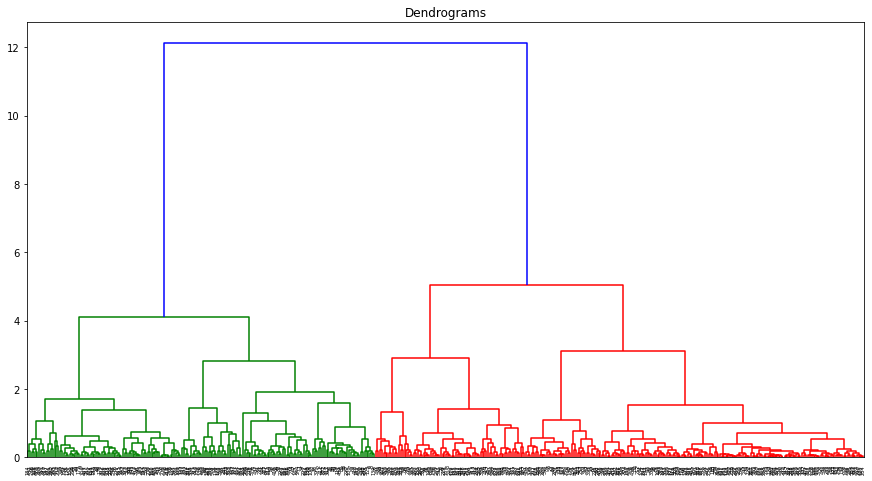

In [138]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(15, 8))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df_nor, method='ward'))

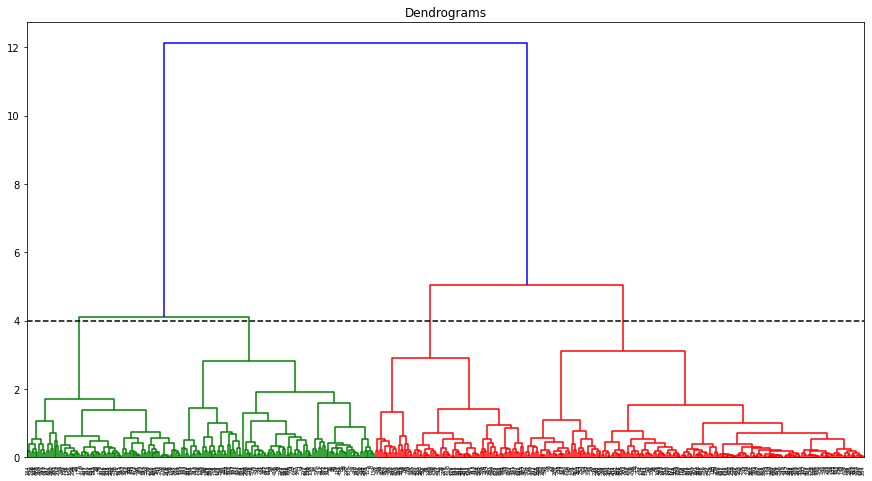

In [139]:
plt.figure(figsize=(15, 8))  
plt.title("Dendrograms")
line = shc.linkage(df_nor, method='ward')
dend = shc.dendrogram( line )
plt.axhline(y=4, color='black', linestyle='--')
plt.show()

In [30]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  

In [31]:
cluster.fit_predict(df_nor)

array([1, 1, 1, 2, 0, 1, 0, 1, 1, 3, 3, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 2,
       0, 1, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 1, 3, 0, 1, 1, 0, 0, 0, 1, 3,
       1, 1, 3, 1, 1, 3, 2, 1, 0, 3, 0, 1, 3, 1, 0, 1, 0, 1, 1, 1, 2, 3,
       3, 0, 1, 0, 2, 0, 2, 2, 1, 0, 2, 1, 0, 1, 0, 3, 1, 0, 0, 3, 1, 0,
       2, 0, 0, 2, 1, 2, 1, 3, 3, 2, 2, 2, 1, 3, 1, 0, 0, 0, 3, 1, 1, 3,
       0, 1, 2, 0, 0, 0, 0, 1, 0, 2, 0, 2, 0, 1, 0, 0, 2, 0, 1, 0, 2, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 2, 0, 1, 0, 0, 2, 0, 0, 1, 0, 1,
       0, 3, 3, 0, 3, 3, 3, 0, 0, 3, 1, 1, 1, 1, 0, 2, 3, 1, 3, 3, 3, 3,
       0, 0, 0, 1, 0, 0, 3, 1, 3, 2, 2, 3, 1, 1, 2, 0, 0, 3, 0, 2, 2, 3,
       2, 0, 3, 3, 0, 3, 3, 3, 0, 1, 3, 3, 0, 3, 0, 1, 3, 3, 3, 0, 3, 2,
       0, 1, 2, 2, 0, 0, 0, 2, 1, 2, 2, 1, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0,
       0, 0, 1, 3, 0, 0, 0, 2, 2, 3, 2, 0, 1, 0, 0, 2, 0, 0, 0, 2, 0, 3,
       3, 1, 3, 0, 1, 0, 2, 1, 1, 0, 1, 1, 0, 2, 2, 0, 1, 0, 0, 2, 0, 0,
       0, 2, 0, 0, 1, 2, 3, 1, 0, 0, 0, 0, 1, 3, 0,

In [32]:
cluster.labels_

array([1, 1, 1, 2, 0, 1, 0, 1, 1, 3, 3, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 2,
       0, 1, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 1, 3, 0, 1, 1, 0, 0, 0, 1, 3,
       1, 1, 3, 1, 1, 3, 2, 1, 0, 3, 0, 1, 3, 1, 0, 1, 0, 1, 1, 1, 2, 3,
       3, 0, 1, 0, 2, 0, 2, 2, 1, 0, 2, 1, 0, 1, 0, 3, 1, 0, 0, 3, 1, 0,
       2, 0, 0, 2, 1, 2, 1, 3, 3, 2, 2, 2, 1, 3, 1, 0, 0, 0, 3, 1, 1, 3,
       0, 1, 2, 0, 0, 0, 0, 1, 0, 2, 0, 2, 0, 1, 0, 0, 2, 0, 1, 0, 2, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 2, 0, 1, 0, 0, 2, 0, 0, 1, 0, 1,
       0, 3, 3, 0, 3, 3, 3, 0, 0, 3, 1, 1, 1, 1, 0, 2, 3, 1, 3, 3, 3, 3,
       0, 0, 0, 1, 0, 0, 3, 1, 3, 2, 2, 3, 1, 1, 2, 0, 0, 3, 0, 2, 2, 3,
       2, 0, 3, 3, 0, 3, 3, 3, 0, 1, 3, 3, 0, 3, 0, 1, 3, 3, 3, 0, 3, 2,
       0, 1, 2, 2, 0, 0, 0, 2, 1, 2, 2, 1, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0,
       0, 0, 1, 3, 0, 0, 0, 2, 2, 3, 2, 0, 1, 0, 0, 2, 0, 0, 0, 2, 0, 3,
       3, 1, 3, 0, 1, 0, 2, 1, 1, 0, 1, 1, 0, 2, 2, 0, 1, 0, 0, 2, 0, 0,
       0, 2, 0, 0, 1, 2, 3, 1, 0, 0, 0, 0, 1, 3, 0,

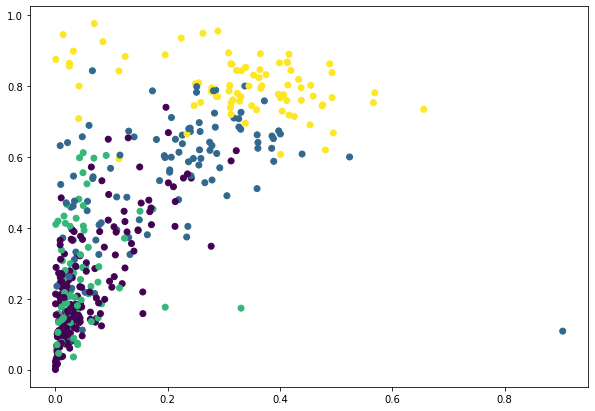

In [35]:
plt.figure(figsize=(10, 7))  
plt.scatter(df_nor['Detergents_Paper'], df_nor['Grocery'], c=cluster.labels_)

###Agrupación jerárquica aglomerativa interactivo con el usuario
Una vez probado el clustering, solicitaremos al usuario elegir el n_clusters y atributos con el que desea evaluar

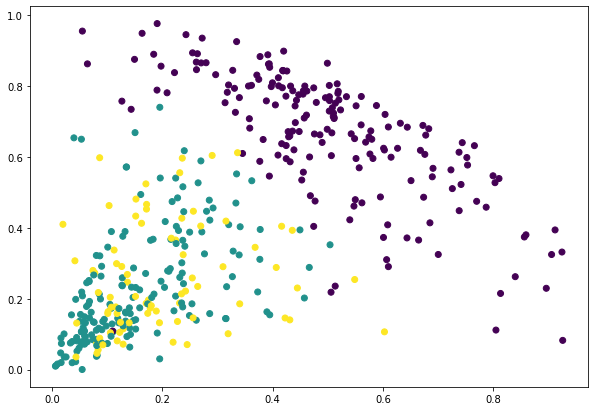

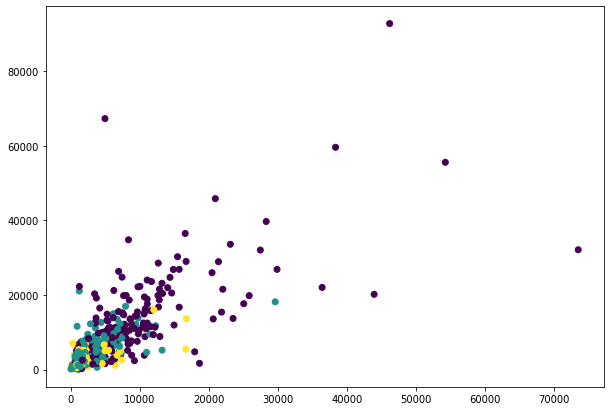

In [193]:
#@title Selección de valores { run: "auto" }
n_clusters = 3 #@param {type:"slider", min:1, max:8, step:1}
distance = 'euclidean' #@param ["euclidean", "manhattan", "cosine"]
linkage = 'ward' #@param ["ward", "complete", "average", "single"]
option = 'Milk' #@param ["Channel", "Region", "Fresh", "Milk", "Grocery", "Frozen","Detergents_Paper", "Delicassen"]
option_2 = 'Grocery' #@param ["Channel", "Region", "Fresh", "Milk", "Grocery", "Frozen","Detergents_Paper", "Delicassen"]

cluster = AgglomerativeClustering(n_clusters=n_clusters, affinity=distance, linkage=linkage)
cluster.fit_predict(df_nor)
cluster.labels_
plt.figure(figsize=(10, 7))  
plt.scatter(df_nor[option], df_nor[option_2], c=cluster.labels_)


plt.figure(figsize=(10, 7))  
plt.scatter(df[option], df[option_2], c=cluster.labels_)


###AffinityPropagation

Matriz de Similitud

In [151]:
productos = set(df_nor.keys())
matrix = pd.DataFrame(0, columns=df_nor.columns, index=df_nor.columns) 

for i in productos:
    for k in productos:
        matrix.loc[i, k] = -((df_nor[i] - df_nor[k])**2).sum()

matrix

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,0.000000,-0.000030,-213.293485,-61.920960,-106.851105,-32.851127,-18.027468,-6.888649
Region,-0.000030,-0.000000,-213.225245,-61.886996,-106.806959,-32.823814,-18.018006,-6.876698
Fresh,-213.293485,-213.225245,-0.000000,-154.576641,-164.598885,-143.109937,-188.454743,-176.776125
Milk,-61.920960,-61.886996,-154.576641,-0.000000,-31.770436,-52.621286,-31.895365,-40.754053
Grocery,-106.851105,-106.806959,-164.598885,-31.770436,-0.000000,-87.135489,-49.654784,-80.577458
Frozen,-32.851127,-32.823814,-143.109937,-52.621286,-87.135489,-0.000000,-37.562641,-23.905757
Detergents_Paper,-18.027468,-18.018006,-188.454743,-31.895365,-49.654784,-37.562641,-0.000000,-15.398683
Delicassen,-6.888649,-6.876698,-176.776125,-40.754053,-80.577458,-23.905757,-15.398683,-0.000000


Preferencia a priori de cada punto

In [154]:
np.fill_diagonal(matrix.values, np.min(matrix.values))
matrix

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,-213.293485,-0.000030,-213.293485,-61.920960,-106.851105,-32.851127,-18.027468,-6.888649
Region,-0.000030,-213.293485,-213.225245,-61.886996,-106.806959,-32.823814,-18.018006,-6.876698
Fresh,-213.293485,-213.225245,-213.293485,-154.576641,-164.598885,-143.109937,-188.454743,-176.776125
Milk,-61.920960,-61.886996,-154.576641,-213.293485,-31.770436,-52.621286,-31.895365,-40.754053
Grocery,-106.851105,-106.806959,-164.598885,-31.770436,-213.293485,-87.135489,-49.654784,-80.577458
Frozen,-32.851127,-32.823814,-143.109937,-52.621286,-87.135489,-213.293485,-37.562641,-23.905757
Detergents_Paper,-18.027468,-18.018006,-188.454743,-31.895365,-49.654784,-37.562641,-213.293485,-15.398683
Delicassen,-6.888649,-6.876698,-176.776125,-40.754053,-80.577458,-23.905757,-15.398683,-213.293485


Mensajes de Disponibilidad

In [155]:
# Matriz de Disponibilidad
matrix_dis = pd.DataFrame(0, columns=df_nor.columns, index=df_nor.columns) 
matrix_dis

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,0,0,0,0,0,0,0,0
Region,0,0,0,0,0,0,0,0
Fresh,0,0,0,0,0,0,0,0
Milk,0,0,0,0,0,0,0,0
Grocery,0,0,0,0,0,0,0,0
Frozen,0,0,0,0,0,0,0,0
Detergents_Paper,0,0,0,0,0,0,0,0
Delicassen,0,0,0,0,0,0,0,0


Mensajes de Responsabilidad

In [156]:
# La responsabilidad se actualiza a partir de la similitud y la disponibilidad
matrix

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,-213.293485,-0.000030,-213.293485,-61.920960,-106.851105,-32.851127,-18.027468,-6.888649
Region,-0.000030,-213.293485,-213.225245,-61.886996,-106.806959,-32.823814,-18.018006,-6.876698
Fresh,-213.293485,-213.225245,-213.293485,-154.576641,-164.598885,-143.109937,-188.454743,-176.776125
Milk,-61.920960,-61.886996,-154.576641,-213.293485,-31.770436,-52.621286,-31.895365,-40.754053
Grocery,-106.851105,-106.806959,-164.598885,-31.770436,-213.293485,-87.135489,-49.654784,-80.577458
Frozen,-32.851127,-32.823814,-143.109937,-52.621286,-87.135489,-213.293485,-37.562641,-23.905757
Detergents_Paper,-18.027468,-18.018006,-188.454743,-31.895365,-49.654784,-37.562641,-213.293485,-15.398683
Delicassen,-6.888649,-6.876698,-176.776125,-40.754053,-80.577458,-23.905757,-15.398683,-213.293485


In [164]:
clustering = AffinityPropagation(random_state=None).fit(df_nor)
print("Etiquetas de Clusters:", clustering.labels_)
print("Índices de Centroides:", clustering.cluster_centers_indices_)


Etiquetas de Clusters: [ 5 18 19 14  6  5  2  0  0  7  7  6  6  2  2  6  7 19  6  2  6 14 14 19
  2  2 14 12  3  4  6 18 12 12 18  7 12  0  3  4 14  6  1 16  0  3  7  1
  0  7 14  1 12  3  4  0  3  1 12  1  2  1  0  1 15 16 16  2 19 12 14  0
 13 14  0  4 17  1 12  3  6  7  0  4  2  7 10 12 15 12  4 15  7 13  3 11
 16 17 17 14  0  7  7 14 12 12  7  1  3 11 12  1 14  4  4 12  6  0  4 14
 12  8  4  5  4  4 14  6 10  4 15 12 12 12  6  6 18  3  6  5  6 12 12 15
 12  1  6  6 15  4 12 19  4 10 12  7 16  4  7  7 16  4 12  7  1  0  1  0
  4 14  7  3  3 16 11  7 12  5  5 19  2 12  7 19 11  5 15 18  1  3 14  4
  6 16  6 14 14  7  6 12  7  7  6 16 11  7 12  7  7  7  4  7  6  1  7  7
 16  4 11 14  4  1 13 17 12  6  6  8  9 15  8 10 12  3 14 10  6  4  4  4
 14  4  4  6  1  7 12  4 12  8  8  7 15  6 19  4  6 14  4 12  6 15  4 17
  7 18 11  4  1  4 15 19  3  4 19 19 12 13 14  2  5  5  4 14 12  4 12 14
  4  4  0  8 17  7 12  2  4  2  1 11  6  7  7 16 16  3  7 12  6  3 13 12
 16 14  2  3 14 11  6  3 18 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fe83ae3b170> (for post_execute):


ValueError: ignored

ValueError: ignored

<Figure size 720x504 with 1 Axes>

In [157]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets import make_blobs
from itertools import cycle

clustering = AffinityPropagation(random_state = 1).fit(df_nor)
cluster_centers_indices = clustering.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = clustering.labels_
print("Estimated number of clusters: %d" % n_clusters_)

Estimated number of clusters: 20


###KMeans

Codo de Jambu
Permite determinar cual es el cluster mas propiado

In [172]:
wcss = []
for i in range (1,11):
  kmeans = KMeans(n_clusters=i, max_iter = 300)
  kmeans.fit(df_nor)
  wcss.append(kmeans.inertia_)

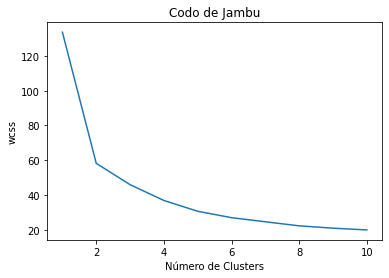

In [173]:
plt.plot(range(1,11),wcss)
plt.title("Codo de Jambu")
plt.xlabel("Número de Clusters")
plt.ylabel("wcss")
plt.show()

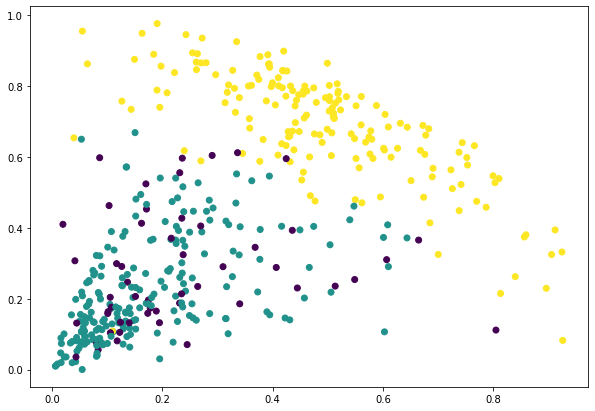

In [179]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0).fit(df_nor)
kmeans.labels_
plt.figure(figsize=(10, 7))  
plt.scatter(df_nor['Milk'], df_nor['Grocery'], c=kmeans.labels_)

###KMeans interactivo con el usuario
Una vez probado el clustering, solicitaremos al usuario elegir el n_clusters y atributos con el que desea evaluar

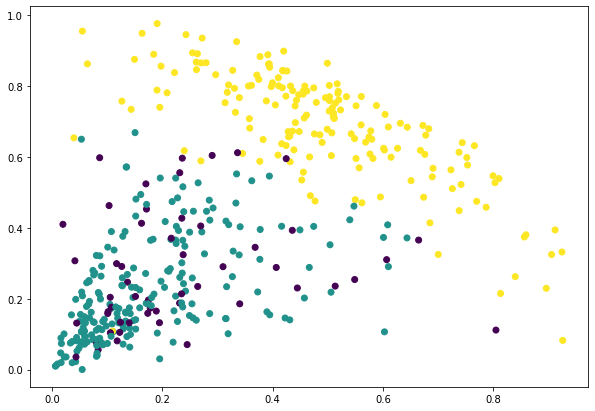

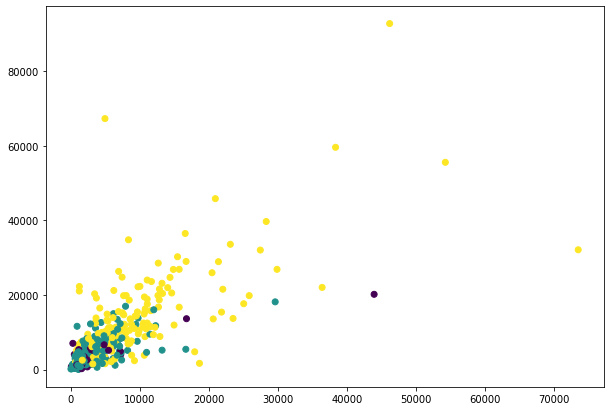

In [194]:
#@title Selección de valores { run: "auto" }
n_clusters = 3 #@param {type:"slider", min:1, max:8, step:1}
algorithm = 'full' #@param ["lloyd", "elkan", "auto", "full"]
option = 'Milk' #@param ["Channel", "Region", "Fresh", "Milk", "Grocery", "Frozen","Detergents_Paper", "Delicassen"]
option_2 = 'Grocery' #@param ["Channel", "Region", "Fresh", "Milk", "Grocery", "Frozen","Detergents_Paper", "Delicassen"]

kmeans = KMeans(n_clusters=3, random_state=0, algorithm = algorithm).fit(df_nor)
kmeans.labels_
plt.figure(figsize=(10, 7))  
plt.scatter(df_nor['Milk'], df_nor['Grocery'], c=kmeans.labels_)

plt.figure(figsize=(10, 7))  
plt.scatter(df['Milk'], df['Grocery'], c=kmeans.labels_)

AffinityPropagation

In [207]:
from sklearn.cluster import AffinityPropagation
Affinity = AffinityPropagation(random_state=0).fit(df_nor)
Affinity.labels_

array([ 5, 18, 19, 14,  6,  5,  2,  0,  0,  7,  7,  6,  6,  2,  2,  6,  7,
       19,  6,  2,  6, 14, 14, 19,  2,  2, 14, 12,  3,  4,  6, 18, 12, 12,
       18,  7, 12,  0,  3,  4, 14,  6,  1, 16,  0,  3,  7,  1,  0,  7, 14,
        1, 12,  3,  4,  0,  3,  1, 12,  1,  2,  1,  0,  1, 15, 16, 16,  2,
       19, 12, 14,  0, 13, 14,  0,  4, 17,  1, 12,  3,  6,  7,  0,  4,  2,
        7, 10, 12, 15, 12,  4, 15,  7, 13,  3, 11, 16, 17, 17, 14,  0,  7,
        7, 14, 12, 12,  7,  1,  3, 11, 12,  1, 14,  4,  4, 12,  6,  0,  4,
       14, 12,  8,  4,  5,  4,  4, 14,  6, 10,  4, 15, 12, 12, 12,  6,  6,
       18,  3,  6,  5,  6, 12, 12, 15, 12,  1,  6,  6, 15,  4, 12, 19,  4,
       10, 12,  7, 16,  4,  7,  7, 16,  4, 12,  7,  1,  0,  1,  0,  4, 14,
        7,  3,  3, 16, 11,  7, 12,  5,  5, 19,  2, 12,  7, 19, 11,  5, 15,
       18,  1,  3, 14,  4,  6, 16,  6, 14, 14,  7,  6, 12,  7,  7,  6, 16,
       11,  7, 12,  7,  7,  7,  4,  7,  6,  1,  7,  7, 16,  4, 11, 14,  4,
        1, 13, 17, 12,  6

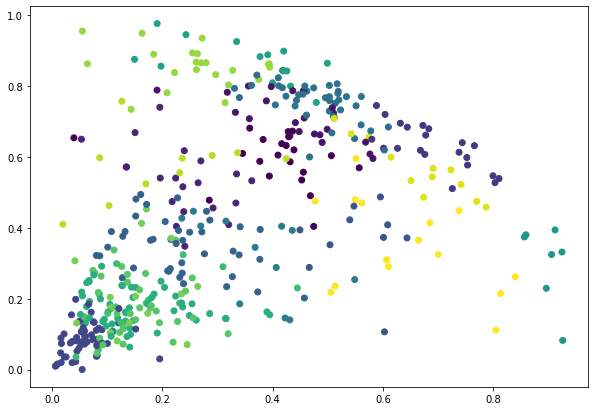

In [208]:
plt.figure(figsize=(10, 7))  
plt.scatter(df_nor['Milk'], df_nor['Grocery'], c=Affinity.labels_)